Trabalho 3

O estudo aqui proposto pode ser encontrado em https://github.com/ViniciusCMB/Metodos_Num.git


Bibliotecas

In [171]:
import numpy as np
import matplotlib.pyplot as plt

Função para resolver o problema

In [172]:
def funcao_C(T, Nx, Lx, alpha, k, dt, CE):
    # Inicializando a matriz de coeficientes e o vetor de solução
    dx = Lx / Nx # passo no espaço
    Nt = int(T / dt)
    A = np.zeros((Nx, Nx))
    C = np.zeros(Nx)

    # Preenchendo a matriz de coeficientes A
    for i in range(1, Nx-1):
        A[i, i-1] = -alpha / dx**2
        A[i, i] = 1 / dt + 2 * alpha / dx**2 + k
        A[i, i+1] = -alpha / dx**2

    # Condições de contorno
    A[0, 0] = 1.0
    A[-1, -1] = 1.0
    A[-1, -2] = -1.0

    # Inicializando a solução
    C[0] = CE

    # Loop no tempo
    for n in range(Nt):
        # Vetor de termos independentes
        b = C / dt
        b[0] = CE
        b[-1] = 0.0

        # Resolvendo o sistema linear
        C = np.linalg.solve(A, b)

    x = np.linspace(0, Lx, Nx)

    return C, x

Parâmetros para a solução

In [173]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE = 5  # valor de C em x = 0

Obtém a solução e o domnínio

In [181]:
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)

C

array([5.        , 4.84498835, 4.69482169, 4.54934986, 4.40842737,
       4.27191331, 4.13967116, 4.01156868, 3.88747778, 3.76727435,
       3.65083819, 3.53805288, 3.42880561, 3.32298715, 3.22049168,
       3.1212167 , 3.02506294, 2.93193424, 2.84173748, 2.75438245,
       2.66978181, 2.58785094, 2.50850793, 2.43167343, 2.3572706 ,
       2.28522504, 2.21546471, 2.14791984, 2.08252289, 2.01920846,
       1.95791325, 1.89857594, 1.84113722, 1.78553963, 1.73172758,
       1.67964725, 1.62924658, 1.58047515, 1.5332842 , 1.48762653,
       1.44345649, 1.4007299 , 1.35940405, 1.3194376 , 1.28079059,
       1.24342437, 1.20730157, 1.17238608, 1.13864297, 1.1060385 ,
       1.07454008, 1.04411619, 1.01473642, 0.98637139, 0.95899273,
       0.93257306, 0.90708597, 0.88250596, 0.85880846, 0.83596977,
       0.81396704, 0.79277829, 0.77238231, 0.75275872, 0.73388788,
       0.71575094, 0.69832974, 0.68160688, 0.66556562, 0.65018993,
       0.63546443, 0.62137439, 0.60790573, 0.59504498, 0.58277

Plota o resultado obtido

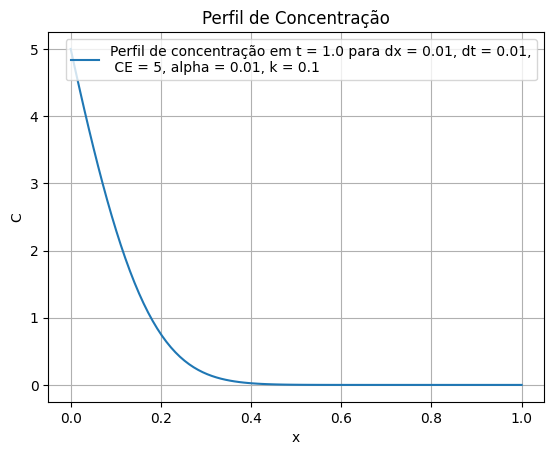

In [175]:
# Plotando o resultado
plt.plot(x, C, label=f'Perfil de concentração em t = {T} para dx = {Lx / (Nx)}, dt = {dt},\n CE = {CE}, alpha = {alpha}, k = {k}')
plt.xlabel('x')
plt.ylabel('C')
plt.grid()
titulo = 'Perfil de Concentração'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

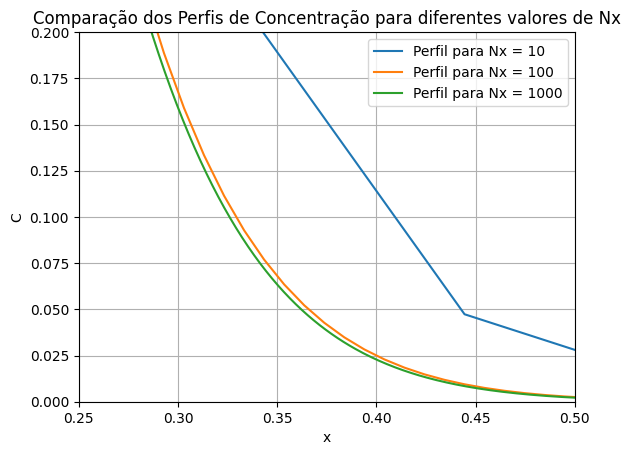

In [176]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 10  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE = 5  # valor de C em x = 0

# Resultado
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para Nx = {Nx}')

Nx = 100  # número de pontos no espaço
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para Nx = {Nx}')

Nx = 1000  # número de pontos no espaço
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para Nx = {Nx}')

# Plotando o resultado
plt.xlabel('x')
plt.ylabel('C')
plt.axis([0.25, 0.5, 0, 0.2])
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de Nx'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

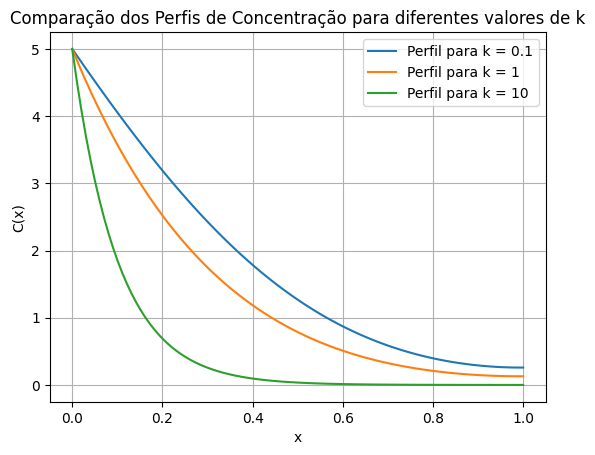

In [177]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.1  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE = 5  # valor de C em x = 0

# Resultado
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para k = {k}')

k = 1  # constante k
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para k = {k}')

k = 10 # constante k
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para k = {k}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de k'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

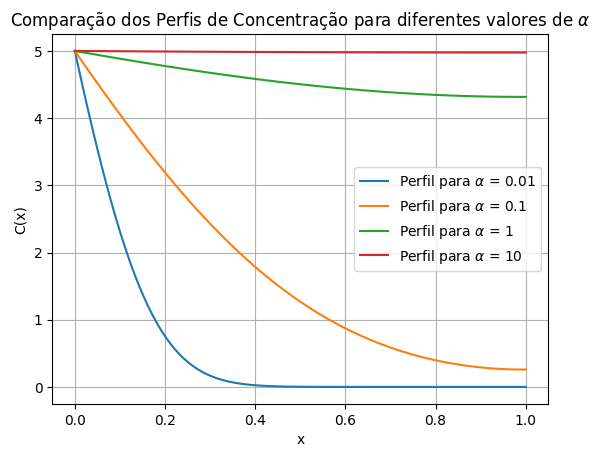

In [178]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE = 5  # valor de C em x = 0

# Resultado
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para $\\alpha$ = {alpha}')

alpha = 0.1  # constante alpha
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para $\\alpha$ = {alpha}')

alpha = 1  # constante alpha
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para $\\alpha$ = {alpha}')

alpha = 10  # constante alpha
C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
plt.plot(x, C, label=f'Perfil para $\\alpha$ = {alpha}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de $\\alpha$'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

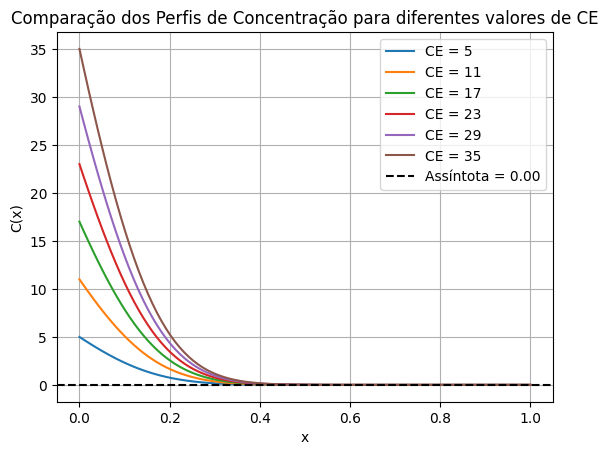

In [179]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo
T = 1.0  # tempo total

# Condições de contorno
CE_values = np.arange(5, 36, 6)  # valor de C em x = 0

valores_finais = []

for CE in CE_values:
    C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
    plt.plot(x, C, label=f'CE = {CE}')
    valores_finais.append(C[-1])

# Calculando a média dos valores finais
media_valores_finais = np.mean(valores_finais)

# Plotando a assíntota
plt.axhline(y=media_valores_finais, color='black', linestyle='--', label=f'Assíntota = {media_valores_finais:.2f}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de CE'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')

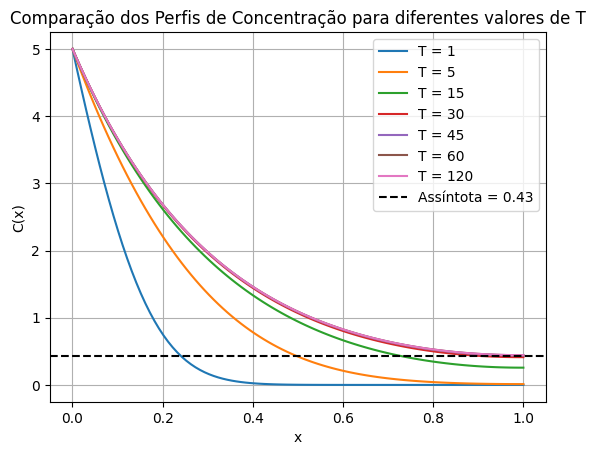

In [180]:
# Definindo parâmetros
Lx = 1.0  # comprimento do domínio
Nx = 100  # número de pontos no espaço
alpha = 0.01  # constante alpha
k = 0.1  # constante k
dt = 0.01  # passo no tempo

# Condições de contorno
CE = 5  # valor de C em x = 0

# Condições de contorno
T_values = [1, 5, 15, 30, 45, 60, 120]  # valores de T variando de 1 até 60

# Valores de T para calcular a média dos valores finais
T_values_assintota = [30, 45, 60, 120]

valores_finais = []

# Plotando os perfis de concentração para os valores de T
for T in T_values:
    C, x = funcao_C(T, Nx, Lx, alpha, k, dt, CE)
    plt.plot(x, C, label=f'T = {T}')
    if T in T_values_assintota:
        valores_finais.append(C[-1])

# Calculando a média dos valores finais
media_valores_finais = np.mean(valores_finais)

# Plotando a assíntota
plt.axhline(y=media_valores_finais, color='black', linestyle='--', label=f'Assíntota = {media_valores_finais:.2f}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de T'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab3/'+titulo+'.png')